# Lab 2: CIFAR-10 Challenge

In this lab you will experiment with whatever ConvNet architecture/design you'd like on [CIFAR-10 image dataset](https://www.cs.toronto.edu/~kriz/cifar.html). 

## Part 1: Creating the network (50% of grade)

**Goal:** After training, your model should achieve **at least 80%** accuracy on a **validation** set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

**Data split** The training set should consist of 40000 images, the validation set should consist of 10000 images, and the test set should consist of the remaining 10000 images. **Please use the Keras `load_data()` function to import the data set.**

**Implementation** All code should be in Keras/python. 

### Some things you can try:
- Different number/type of layers
- Different filter sizes 
- Adjust the number of filters used in any given layer
- Try various pooling strategies
- Consider using batch normalization
- Explore different numbers of layers in your network
- Check if adding regularization helps
- Consider alternative optimizers
- Try different activation functions


### Tips for training
When building/tuning your model, keep in mind the following points: 

- This is experimental, so be driven by results achieved on the validation set as opposed to what you have heard/read works well or doesn't
- If the hyperparameters are working well, you should see improvement in the loss/accuracy within a few hundred iterations (usually within one epoch)
- For hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all
- Once you have found some sets of hyperparameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- Prefer one validation to to cross-validation 
- Prefer random search to grid search for hyperparameters
- You should use the validation set for hyperparameter search and for evaluating different architectures
- The test set should only be used at the very end to evaluate your final model

### What to provide

The cell below should contain all the code necessary to run your final network on the cifar10 dataset as contained within Keras. All necessary hyperparameters should be visible either in the code or through comments. Your code should include 2 plots: one for training and validation loss per epoch and one for training and validation accuracy per epoch.  

Your network should produce an accuracy of at least 80% on the validation set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

You should also evaluate and report the accuracy on the test set. The test set should be used only once. That is, after you have decided on what to include in your network and tuned any hyperparameters for your final network, you should use this final network on the test set and calculate the accuracy.  

**Please make sure that all code has been run and the output is visible in the notebook before submitting.**

**Please note that I should be able to run the single code cell below and reproduce your results.**

**All code should be in ONE code cell.**

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________

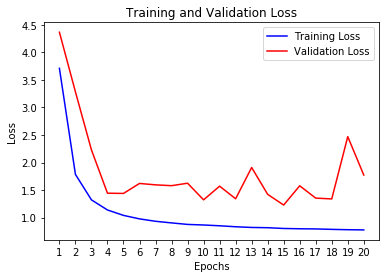

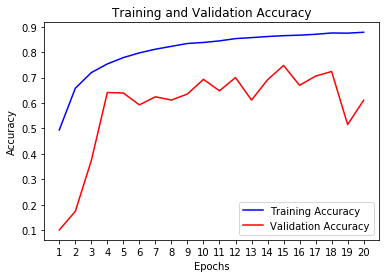

10000/10000 [==============================] - 12s 1ms/sample - loss: 1.7855 - accuracy: 0.5996


In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Use the first 10,000 samples of our training data as our validation set
val_images = train_images[:10000]
val_labels = train_labels[:10000]

# Use the remainder of the original training data for actual training
partial_train_images = train_images[10000:]
partial_train_labels = train_labels[10000:]

# Scale the pixel values so they lie in the range of 0-1
partial_train_images = partial_train_images / 255.
val_images = val_images / 255.
test_images = test_images /255.

print(partial_train_images.shape)
print(val_images.shape)
print(test_images.shape)

# we need to convert our label data to the correct format.
partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# Building the model

model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2', 
        input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
    
        
        Dense(128, activation='relu', kernel_regularizer='l2'),
        
        Dense(10, activation='softmax')
    ])



# Model Summary
model.summary()

# Compile the Model
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit data to Model
history = model.fit(partial_train_images, 
                    partial_train_labels, 
                    epochs=20, 
                    batch_size=256, 
                    validation_data=(val_images, val_labels),
                    verbose=1)
history.history.keys()

# Plot for training and validation loss per epoch
history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plot for training and valodation accuracy per epoch
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()
 
    
# Test Accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels)

## Part 2: Describe What you did (50% of grade)

All the work you did leading up to your final model from **Part 1** should be summarized in this section. This should be a logical and well-organized summary of the various experiments that were tried in **Part 1**. You should write an explanation of what you did and how you made decisions. Upon reading this section I should understand the reasoning that lead you to your final model. All references should be included in the noted section below. 

See [this guide](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) for how to format markdown cells in Jupyter notebooks. For instance, it may be convenient to report your results in table format. 

### In the above CNN model, 
#### The data is divided into Training data, validation data and testing data<br>
1. Training data - 40000 images
2. Validation data - 10000 images
3. Testing data - 10000 images

### Experiment 1
1. 4 layers with filter sizes 32,64,128,256 respectively
2. Activation function - relu
3. Batch size - 256
4. Optimizer - 'rmsprop'
5. Validation Accuracy - 66%

### Experiment 2
#### In this experiment we tried using a pooling strategy to improve the performance
1. 4 layers with filter sizes 32, 64,128, 256 respectively
2. Activation fucntion - relu
3. Max2Dpooling
4. Optimizer - 'rmsprop'
5. Batch size - 256
6. Validation Accuracy- 70.33%

### Experiment 3
#### In this experiment we used pooling since we observed increase in accuracy in exp2, changed the optimizer and reduced the batch size
1. 4 layers with filter sizes 32, 64,128, 256 respectively
2. Activation function - relu
3. Max2Dpooling
4. Optimizer - 'SGD'
5. Batch size - 128
6. Validation Accuracy - 53.33%

### Experiment 4
#### In this experiment we used extra layers along with pooling
1. 6 layers with filter 32, 32 ,64,64,128 and 256 respectively 
2. Activation function - relu
3. Max2Dpooling
4. Optimizer -'SGD'
5. Batch size - 256
6. Validation accuracy - 58.01 %

### Experiment 5
#### Here we tried changing the filter sizes keeping everything same as the previous exp.
1. Filters - 32,64,128, 256
2. Activation function - relu
3. Max2Dpooling
4. batch size - 256
5. optimizer - SGD
6. Validation accuracy - 69.99%

### Experiment 6
#### In this experiment we used kernel regularizer and batch normalization
#### Kernel regularizer applies penalty on the layer's kernel
#### Batch normalization is used to stabilize the learning process and make neural networks work faster.
1. 6 layers with filters 32,32,64,64,128,256
2. Activation function - relu
3. Max2Dpooling
4. batch size - 256
5. optimizer - 'rmsprop'
6. Validation accuracy - 66.6% 

### Experiment 7
#### In this experiment we changed the filters and layers, keeping other parameters same as experiment 6.
1. 4 layers with filters 32,32,64,64
2. Activation function - relu
3. Max2Dpooling
4. Kernel regularizer l2
5. Batch normalization
6. optimizer - 'rmsprop'
7. Epochs -20
7. Validation accuracy - 74.77%



### References

Please include all references used in completing this lab: books, tutorials, blogs, github, etc.

<ol>
<li>https://www.machinecurve.com/index.php/2020/02/09/how-to-build-a-convnet-for-cifar-10-and-cifar-100-classification-with-keras/</li>
<li>https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/</li>
<li>https://medium.com/@dipti.rohan.pawar/improving-performance-of-convolutional-neural-network-2ecfe0207de7</li>
</ol>